<h1> <center> Assignment </center></h1>

# Import Libraries

In [303]:
#Basic Operations
import pandas as pd
import numpy as np

#Modelling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Visuals
import matplotlib 
%matplotlib inline
sns.set_style("whitegrid")
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling


# Part 1 :
● Load the data using Python Pandas library or equivalent <br>
● Do Exploratory Data Analysis of the data and state your insights

## Data Reading

In [179]:
raw_df = pd.read_csv('airq402.csv',header=None)
raw_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94


In [180]:
headers = pd.read_csv('airq402dim.csv', header=None)

In [181]:
headers

,0
0,City1
1,City2
2,Average Fare
3,Distance
4,Average weekly passengers
5,market leading airline
6,market share
7,Average fare
8,Low price airline
9,market share


In [182]:
raw_df.columns = headers.iloc[:,0]

In [183]:
raw_df.head(3)

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12


# Part 2 :
● Treat “Average Fare” – 3rd Column as your Dependent Variable and Rest of the columns as
Independent Variable.<br>
● Create Scatter Plot of Independent Variable vs Dependent Variable.<br>
● Based on Scatter Plot see if there is any transformation required for Independent Variable.<br>
● Build Multiple Linear Regression model.<br>
● Get the accuracy score on train and test data.<br>

In [175]:
raw_df.rename({'Average Fare':'average_fare_tg'}, axis='columns', inplace = True)
# raw_df.rename(index = {}, inplace = True)

In [185]:
# Make lower
raw_df.columns = [name.lower() for name in raw_df.columns]

#Remove trailing blanks
raw_df.columns = [name.strip() for name in raw_df.columns]

#Replace space with underscore
raw_df.columns = [name.replace(" ","_") for name in raw_df.columns]

In [217]:
raw_df.columns = ['city1', 'city2', 'average_fare_tg', 'distance',
       'average_weekly_passengers', 'market_leading_airline', 'ml_market_share',
       'average_fare', 'low_price_airline', 'lp_market_share', 'price']
raw_df.isnull().sum()

city1                        0
city2                        0
average_fare_tg              0
distance                     0
average_weekly_passengers    0
market_leading_airline       0
ml_market_share              0
average_fare                 0
low_price_airline            0
lp_market_share              0
price                        0
dtype: int64

In [218]:
print(raw_df.shape)
df = raw_df.drop_duplicates()
print(df.shape)

(1000, 11)
(1000, 11)


In [219]:
df.columns

Index(['city1', 'city2', 'average_fare_tg', 'distance',
       'average_weekly_passengers', 'market_leading_airline',
       'ml_market_share', 'average_fare', 'low_price_airline',
       'lp_market_share', 'price'],
      dtype='object')

## Defining Variables

In [257]:
var_y = ['average_fare_tg']
var_x =['city1', 'city2', 'distance',
        'average_weekly_passengers', 'market_leading_airline', 'ml_market_share',
        'average_fare', 'low_price_airline', 'lp_market_share', 'price']

cat_x = ['city1', 'city2','low_price_airline','market_leading_airline']
num_x = ['distance','average_weekly_passengers', 'ml_market_share','average_fare',
         'lp_market_share', 'price']

In [225]:
# print(pd.crosstab(df['city1'], df['low_price_airline']))
# for col in cat_x:
#     print(col)
#     print(df[col].value_counts())

In [258]:
df.head()

,city1,city2,average_fare_tg,distance,average_weekly_passengers,market_leading_airline,ml_market_share,average_fare,low_price_airline,lp_market_share,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


## Visuals

In [259]:
profile = pandas_profiling.ProfileReport(df)
profile

Number of variables,11
Number of observations,1000
Total Missing (%),0.0%
Total size in memory,93.8 KiB
Average record size in memory,96.0 B
Numeric,6
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [260]:
df[num_x].head()

,distance,average_weekly_passengers,ml_market_share,average_fare,lp_market_share,price
0,528,424.56,70.19,111.03,70.19,111.03
1,860,276.84,75.10,123.09,17.23,118.94
2,852,215.76,78.89,223.98,2.77,167.12
3,288,606.84,96.97,68.86,96.97,68.86
4,723,313.04,39.79,161.36,15.34,145.42


## Scatter Plots

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

<Figure size 432x288 with 0 Axes>

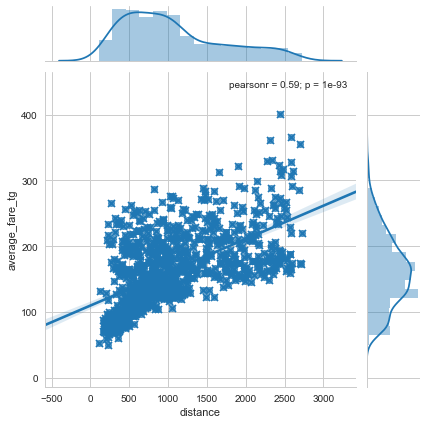

<Figure size 432x288 with 0 Axes>

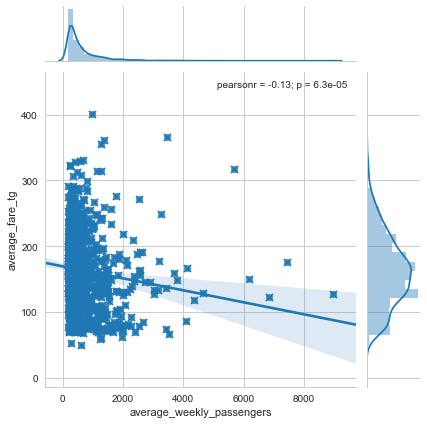

<Figure size 432x288 with 0 Axes>

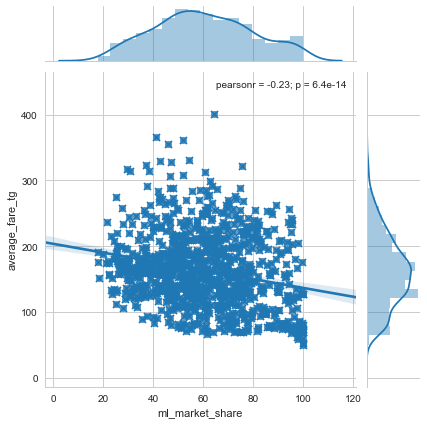

<Figure size 432x288 with 0 Axes>

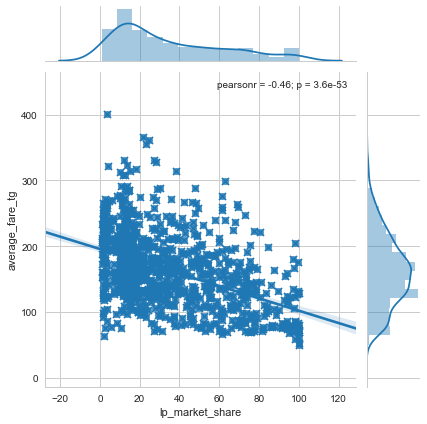

<Figure size 432x288 with 0 Axes>

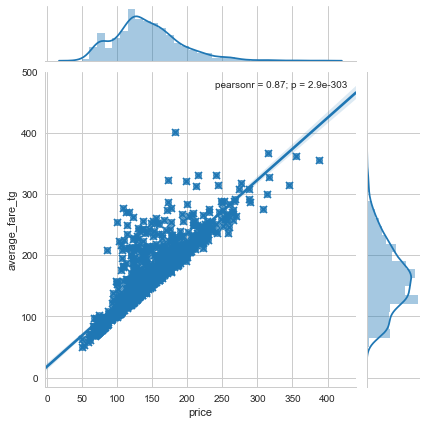

In [288]:
for col in num_x:
    plt.figure()
#     sns.lmplot(x = col,
#                y = 'average_fare_tg',
#               data = df)
    graph = sns.jointplot(x = col, y = 'average_fare_tg',data = df,
                  kind="reg")
    graph.plot_joint(plt.scatter, marker = 'x')

In [262]:
df.head()

,city1,city2,average_fare_tg,distance,average_weekly_passengers,market_leading_airline,ml_market_share,average_fare,low_price_airline,lp_market_share,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


# Part 3:
● Find the most important features of this dataset to predict the average fare
● Figure out what other model can be applied to improve the model performance
● What are other ways this data can be improved which will help in improving the prediction
● State your final observations after this complete analysis

In [263]:
num_x

['distance',
 'average_weekly_passengers',
 'ml_market_share',
 'average_fare',
 'lp_market_share',
 'price']

## Running Linear Regression

In [332]:
def run_regression():
    y = df[var_y]
    X = df[num_x]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Model initialization
    regression_model = LinearRegression()

    # Fit the data(train the model)
    regression_model.fit(X_train, y_train)

    # Predict
    y_predicted = regression_model.predict(X_test)

    # model evaluation
    rmse = mean_squared_error(y_test, y_predicted)
    r2 = r2_score(y_test, y_predicted)

#     plt.figure()
#     sns.lmplot(x = y_predicted,
#                y = y_test)

    #Plot Actual with the predicted
    plt.figure(figsize=(12, 6))
    plt.plot(y_test,y_predicted,  'o')           # scatter plot showing actual data
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual Vs Predicted')
    plt.show()

    
    # printing values
    print('Slope:' ,regression_model.coef_)
    print('Intercept:', regression_model.intercept_)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)

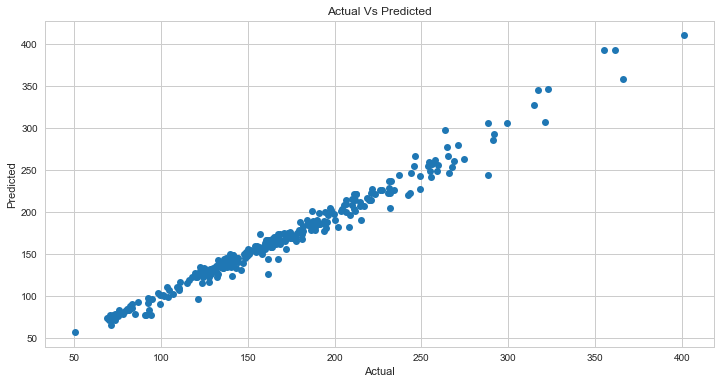

Slope: [[ 0.0029391  -0.0008039   0.08137102  0.72015431 -0.05939781  0.20700705]]
Intercept: [8.20254985]
Root mean squared error:  83.61017272022363
R2 score:  0.9766752927360264


In [333]:
run_regression()

In [295]:
print(np.array(num_x))
regression_model.coef_

['distance' 'average_weekly_passengers' 'ml_market_share'
 'lp_market_share' 'price']


array([[ 0.0029391 , -0.0008039 ,  0.08137102,  0.72015431, -0.05939781,
         0.20700705]])

## Removing Average fare

In [331]:
num_x = ['distance','average_weekly_passengers', 'ml_market_share',
         'lp_market_share', 'price']

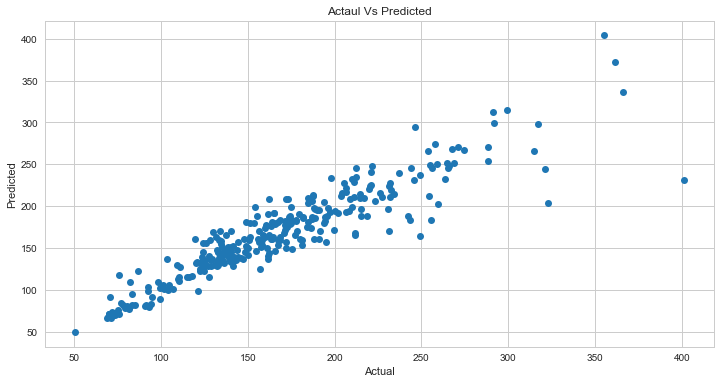

Slope: [[ 8.23120293e-03  7.55617267e-04  4.26920032e-01 -5.76592069e-01
   9.23037329e-01]]
Intercept: [16.31109186]
Root mean squared error:  538.1118500836275
R2 score:  0.8498830827622493


In [311]:
run_regression()

## Important Variables List

In [312]:
print(np.array(num_x))
regression_model.coef_

['distance' 'average_weekly_passengers' 'ml_market_share'
 'lp_market_share' 'price']


array([[ 0.0029391 , -0.0008039 ,  0.08137102,  0.72015431, -0.05939781,
         0.20700705]])

# Improving Model Performance

## Using Interaction Based Model

In [313]:
def run_regression_with_Interaction():
    y = df[var_y]
    X = df[num_x]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    poly = preprocessing.PolynomialFeatures(interaction_only=True,include_bias = False)
    poly.fit_transform(X_train)

    # Model initialization
    regression_model = LinearRegression()

    # Fit the data(train the model)
    regression_model.fit(X_train, y_train)

    # Predict
    y_predicted = regression_model.predict(X_test)

    # model evaluation
    rmse = mean_squared_error(y_test, y_predicted)
    r2 = r2_score(y_test, y_predicted)

    #Plot Actual with the predicted
    plt.figure(figsize=(12, 6))
    plt.plot(y_test,y_predicted,  'o')           # scatter plot showing actual data
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual Vs Predicted')
    plt.show()

    
    # printing values
    print('Slope:' ,regression_model.coef_)
    print('Intercept:', regression_model.intercept_)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)

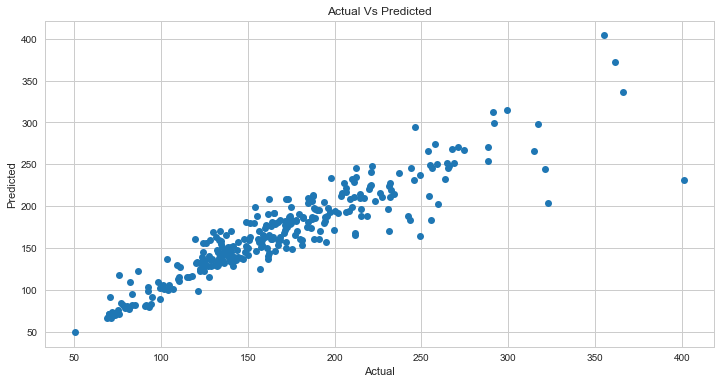

Slope: [[ 8.23120293e-03  7.55617267e-04  4.26920032e-01 -5.76592069e-01
   9.23037329e-01]]
Intercept: [16.31109186]
Root mean squared error:  538.1118500836275
R2 score:  0.8498830827622493


In [314]:
run_regression_with_Interaction()

In [315]:
print(np.array(num_x))
regression_model.coef_

['distance' 'average_weekly_passengers' 'ml_market_share'
 'lp_market_share' 'price']


array([[ 0.0029391 , -0.0008039 ,  0.08137102,  0.72015431, -0.05939781,
         0.20700705]])

## Using Ridge
* Prevent over fitting coming form a very simple linear regression * 

In [319]:
from sklearn.linear_model import Ridge

def run_regression_with_ridge():
    y = df[var_y]
    X = df[num_x]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
    # restricted and in this case linear and ridge regression resembles
    rr.fit(X_train, y_train)
   
    # Predict
    y_predicted = rr.predict(X_test)

    # model evaluation
    rmse = mean_squared_error(y_test, y_predicted)
    r2 = r2_score(y_test, y_predicted)

    #Plot Actual with the predicted
    plt.figure(figsize=(12, 6))
    plt.plot(y_test,y_predicted,  'o')           # scatter plot showing actual data
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual Vs Predicted')
    plt.show()

    
    # printing values
    print('Slope:' ,rr.coef_)
    print('Intercept:', rr.intercept_)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)

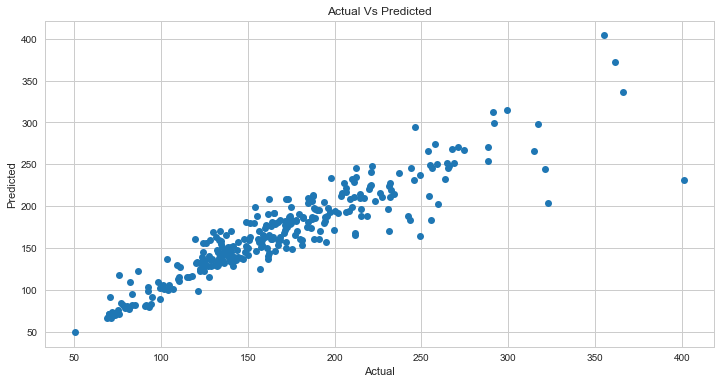

Slope: [[ 8.23120305e-03  7.55617061e-04  4.26920004e-01 -5.76592054e-01
   9.23037319e-01]]
Intercept: [16.31109443]
Root mean squared error:  538.1118496793202
R2 score:  0.8498830828750388


In [320]:
run_regression_with_ridge()

## Using Lasso

In [329]:
from sklearn.linear_model import Lasso

def run_regression_with_lasso():
    y = df[var_y]
    X = df[num_x]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    lasso = Lasso()
    lasso.fit(X_train,y_train)
    train_score=lasso.score(X_train,y_train)
    test_score=lasso.score(X_test,y_test)
    coeff_used = np.sum(lasso.coef_!=0)
    
    print ("training score:", train_score)
    print ("test score: ", test_score)
    print ("number of features used: ", coeff_used)
    
    lasso001 = Lasso(alpha=0.01, max_iter=10e5)
    lasso001.fit(X_train,y_train)
    train_score001=lasso001.score(X_train,y_train)
    test_score001=lasso001.score(X_test,y_test)
    coeff_used001 = np.sum(lasso001.coef_!=0)
    print ("training score for alpha=0.01:", train_score001) 
    print ("test score for alpha =0.01: ", test_score001)
    print ("number of features used: for alpha =0.01:", coeff_used001)

    
    # Predict
    y_predicted = lasso.predict(X_test)

    # model evaluation
    rmse = mean_squared_error(y_test, y_predicted)
    r2 = r2_score(y_test, y_predicted)

    #Plot Actual with the predicted
    plt.figure(figsize=(12, 6))
    plt.plot(y_test,y_predicted,  'o')           # scatter plot showing actual data
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual Vs Predicted')
    plt.show()

    
    # printing values
    print('Slope:' ,lasso.coef_)
    print('Intercept:', lasso.intercept_)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)

training score: 0.8243715448865964
test score:  0.8498851753544793
number of features used:  5
training score for alpha=0.01: 0.8243740582869666
test score for alpha =0.01:  0.8498831504884069
number of features used: for alpha =0.01: 5


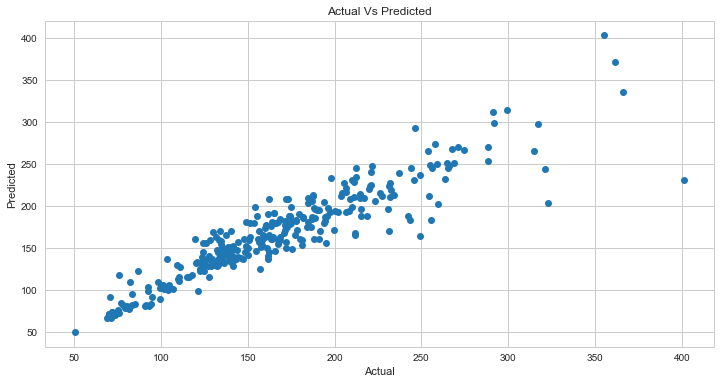

Slope: [ 8.20846471e-03  7.27841445e-04  4.22478764e-01 -5.74708496e-01
  9.22301180e-01]
Intercept: [16.6605874]
Root mean squared error:  538.1043489392059
R2 score:  0.8498851753544793


In [330]:
run_regression_with_lasso()

# Insights from Model

*Inverse relation of the average fare of the low price airline with its market share is more strong than marlet leading airline's market share.*
*Average Fare and Price and distance is highly correlelated as expected*
* It is observed that average_fare in the independent variable list is highly correlated with the dependent variable average_fare_tg, so we tried removing it and running the model again which reduced our test score from .97 to .84 which with more reliability and reduced bias
* Also, there were two columns with same name as market_share, so intuitively former one is considered to be of market leader and later of lowe price airline

** We tried 3 different methods to improve model performance: **
* Introducing interaction effect 
* Adding ridge regularisation
* Adding Lasso

** However, we didn't observe much improvement in the model,<br> Market leading airline's market share come
out to be the most important feature in predicting **